<a href="https://colab.research.google.com/github/shirkepranav98/Play-Store-App-Review-Analysis-/blob/main/Project_on_Black_Friday_dataset_EDA_%26_feature_engg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Friday Dataset EDA And Feature Engineering 
Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# train data saving in df_train
df_train = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Project on Black Friday Dataset/dataset/train.csv')

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
# INFO
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# test data saving in df_test
df_test = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Project on Black Friday Dataset/dataset/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Merging train & test data
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
# DEScribe
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Handling the categorical features

In [9]:
# dropping the User_ID

df.drop(['User_ID'],axis=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [10]:
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [11]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# Handling the categorical features
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# mapping

df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [14]:
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2])

In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df_city = pd.get_dummies(df['City_Category'],drop_first= True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
df = pd.concat([df,df_city],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
# drop city_category feature
df.drop('City_Category',axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,1006037,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
# Missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## we cannot change purchase null values but in product category values we can definitely make some sort of replacement.


In [22]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

### we can get Product_Category_2 have discrete categorical feature. so we can repace NaN values with mode of data in Product_Category_2.

In [23]:
#df.Product_Category_2.mode()[0]

In [24]:
# Replace Nan values with mode in Product_Category_2
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])
df.Product_Category_2.unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [25]:
df.Product_Category_2.isnull().sum()

0

In [26]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### we can get Product_Category_3 have discrete categorical feature. so we can repace NaN values with mode of data in Product_Category_3.

In [27]:
# Replace Nan values with mode in Product_Category_3
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])
df.Product_Category_3.unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [33]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [34]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
# replacing 4+ with 4 in Stay_In_Current_City_Years
df["Stay_In_Current_City_Years"]= df["Stay_In_Current_City_Years"].str.replace('+', '')
df.Stay_In_Current_City_Years.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


array(['2', '4', '3', '1', '0'], dtype=object)

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  uint8  
 13  C             

In [42]:
# converting object into integers
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  uint8  
 13  C             

In [45]:
# converting object into integers for columns B & C
df.B = df.B.astype(int)
df.C = df.C.astype(int)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  int64  
 13  C             

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


# Visualisation

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


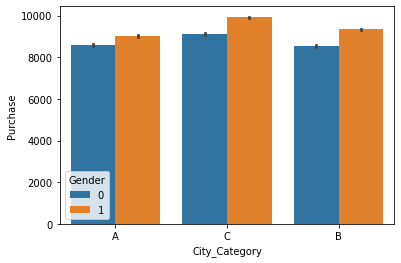

In [51]:
# barplot Age VS Purchase
sns.barplot('City_Category', 'Purchase', hue='Gender',data=df)

### Purchasing power of men over women is high.

In [52]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


## Feature Scaling with Purchase NaN values

In [60]:
# df_test with all Nan purchase values
df_test =df[df.Purchase.isnull()]
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,16.0,NaN,1,0
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,16.0,NaN,0,1
2,1000010,P00288442,0,4,1,B,4,1,5,14.0,16.0,NaN,1,0
3,1000010,P00145342,0,4,1,B,4,1,4,9.0,16.0,NaN,1,0
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN,0,1


In [61]:
# df_train with all possible non null purchase values
df_train =df[~df.Purchase.isnull()]
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [62]:
#dropping the purchase column for train test split
X=df_train.drop('Purchase',axis=1)

In [63]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,0,1


In [64]:
# getting only purcahse non null values for y variable
y = df_train.Purchase

In [67]:
y.shape

(550068,)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [72]:
X_train.drop('City_Category',axis=1,inplace=True)
X_test.drop('City_Category',axis=1,inplace=True)

In [73]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)